https://scikit-learn.org/stable/auto_examples/calibration/plot_compare_calibration.html#sphx-glr-auto-examples-calibration-plot-compare-calibration-py

Create a classification dataset

In [1]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

x, y = make_classification(
    n_samples=100_000, n_features=20, n_informative=2, n_redundant=2, random_state=42
)

# import numpy as np
# import pandas as pd
# import matplotlib as plt

# data = pd.read_csv("C:\\Users\\crona\\Downloads\\4B_tron\\Capstone\\Workout_Watcher\\test1.csv")
# y = data[data.columns[5]]
# x = data[data.columns[[2, 3]]]

# Samples used for training the models
train_samples = 20
x_train, x_test, y_train, y_test = train_test_split(
    x,
    y,
    shuffle=False,
    test_size=120 - train_samples,
)

Create the classification models 

In [2]:
from sklearn.calibration import CalibrationDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

# Create classifiers
lr = LogisticRegression()
gnb = GaussianNB()
rfc = RandomForestClassifier()

clf_list = [
    (lr, "Logistic"),
    (gnb, "Naive Bayes"),
    (rfc, "Random forest"),
]

Train the model and then display the calibration curve.

ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 'foot'

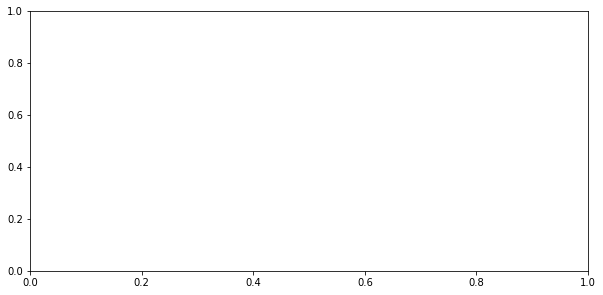

In [3]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

fig = plt.figure(figsize=(10, 10))
gs = GridSpec(4, 2)
colors = plt.cm.get_cmap("Dark2")

ax_calibration_curve = fig.add_subplot(gs[:2, :2])
calibration_displays = {}
markers = ["^", "v", "s", "o"]
for i, (clf, name) in enumerate(clf_list):
    clf.fit(x_train, y_train)
    display = CalibrationDisplay.from_estimator(
        clf,
        x_test,
        y_test,
        n_bins=10,
        name=name,
        ax=ax_calibration_curve,
        color=colors(i),
        marker=markers[i],
    )
    calibration_displays[name] = display

ax_calibration_curve.grid()
ax_calibration_curve.set_title("Calibration plots")

# Add histogram
grid_positions = [(2, 0), (2, 1), (3, 0), (3, 1)]
for i, (_, name) in enumerate(clf_list):
    row, col = grid_positions[i]
    ax = fig.add_subplot(gs[row, col])

    ax.hist(
        calibration_displays[name].y_prob,
        range=(0, 1),
        bins=10,
        label=name,
        color=colors(i),
    )
    ax.set(title=name, xlabel="Mean predicted probability", ylabel="Count")

plt.tight_layout()
plt.show()